# Classical Algorithm: LSTM

In [ ]:
pip install tensorflow

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold, train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [ ]:
# Load the dataset
dataset_path = '/content/drive/MyDrive/typeII_AGN_metadata.csv'
data = pd.read_csv(dataset_path)

# Define the features and target column
features = [
    'h_beta_flux', 'h_beta_flux_err', 'oiii_5007_flux', 'oiii_5007_flux_err',
    'h_alpha_flux', 'h_alpha_flux_err', 'nii_6584_flux', 'nii_6584_flux_err',
    'log_stellar_sigma', 'psfMag_u', 'psfMag_g', 'psfMag_r', 'psfMag_i', 'psfMag_z',
    'psfMagErr_u', 'psfMagErr_g', 'psfMagErr_r', 'psfMagErr_i', 'psfMagErr_z',
    'mendel_logM_p50', 'mendel_logM_p16', 'mendel_logM_p84', 'mendel_logMt_p50',
    'mendel_logMt_p16', 'mendel_logMt_p84', 'mendel_logMb_p50', 'mendel_logMb_p16',
    'mendel_logMb_p84', 'mendel_logMd_p50', 'mendel_logMd_p16', 'mendel_logMd_p84',
    'simard_b_t_g', 'simard_e_b_t_g', 'simard_b_t_r', 'simard_e_b_t_r', 'simard_Rhlg',
    'simard_Rhlr', 'simard_Rchl_g', 'simard_Rchl_r', 'simard_Re', 'simard_e_Re',
    'simard_e', 'simard_e_e', 'simard_nb', 'simard_e_nb', 'simard_PpS', 'simard_Pn4'
]
target = 'log_bh_mass'

In [ ]:
# Handle missing values by filling with column mean
data.fillna(data.mean(), inplace=True)

# Extract features and target
X = data[features].values
y = data[target].values

# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reshape data for LSTM
X_scaled = X_scaled.reshape((X_scaled.shape[0], 1, X_scaled.shape[1]))

In [ ]:
# Define 5-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

r2_scores, mae_scores, mse_scores, rmse_scores = [], [], [], []

for train_index, test_index in kf.split(X_scaled):
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Define LSTM model
    model = Sequential()
    model.add(LSTM(50, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True))
    model.add(LSTM(50))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')

    # Train the model
    model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0)

    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate metrics
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)

    r2_scores.append(r2)
    mae_scores.append(mae)
    mse_scores.append(mse)
    rmse_scores.append(rmse)

    print(f'Fold results - R²: {r2:.4f}, MAE: {mae:.4f}, MSE: {mse:.4f}, RMSE: {rmse:.4f}')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step
Fold results - R²: 0.4859, MAE: 0.3634, MSE: 0.2081, RMSE: 0.4562


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step
Fold results - R²: 0.5296, MAE: 0.3390, MSE: 0.1867, RMSE: 0.4321


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step
Fold results - R²: 0.4701, MAE: 0.3529, MSE: 0.2186, RMSE: 0.4676


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step
Fold results - R²: 0.5578, MAE: 0.3312, MSE: 0.1780, RMSE: 0.4219


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step
Fold results - R²: 0.5288, MAE: 0.3374, MSE: 0.1925, RMSE: 0.4388


In [ ]:
# Average metrics
avg_r2 = np.mean(r2_scores)
avg_mae = np.mean(mae_scores)
avg_mse = np.mean(mse_scores)
avg_rmse = np.mean(rmse_scores)

# Accuracy by error
range_y = np.max(y) - np.min(y)
accuracy_r2 = (np.std(r2_scores)) * 100
accuracy_mae = (1 - np.std(mae_scores) / range_y) * 100
accuracy_mse = (1 - np.std(mse_scores) / range_y) * 100
accuracy_rmse = (1 - np.std(rmse_scores) / range_y) * 100

print(f'Average R²: {avg_r2:.4f}')
print(f'Average MAE: {avg_mae:.4f}, Accuracy: {accuracy_mae:.2f}%')
print(f'Average MSE: {avg_mse:.4f}, Accuracy: {accuracy_mse:.2f}%')
print(f'Average RMSE: {avg_rmse:.4f}, Accuracy: {accuracy_rmse:.2f}%')


Average R²: 0.5144
Average MAE: 0.3448, Accuracy: 99.77%
Average MSE: 0.1968, Accuracy: 99.71%
Average RMSE: 0.4433, Accuracy: 99.67%


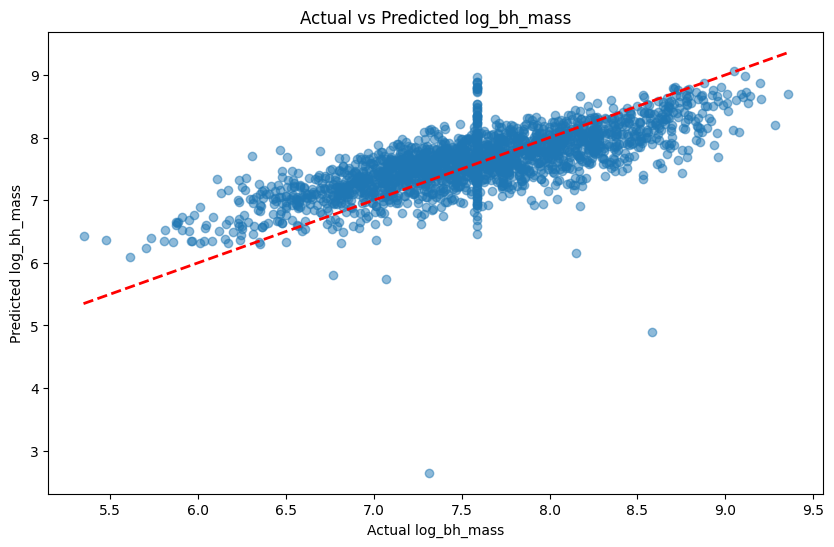

In [ ]:
# Plot actual vs predicted
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--', lw=2)
plt.xlabel('Actual log_bh_mass')
plt.ylabel('Predicted log_bh_mass')
plt.title('Actual vs Predicted log_bh_mass')
plt.show()